## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [2]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [3]:
# # Opening JSON file 
# f = open("complaints-2021-05-14_08_16.json")
  
# # returns JSON object as  
# # a dictionary 
# data = json.load(f)
# df=pd.json_normalize(data)

## Data preparation

In [4]:
# # Inspect the dataframe to understand the given data.
# df.head()


In [5]:
# #Length of dataframe
# print("Total entries in dataframe is :",len(df))
# # df.to_excel("complaint.xlsx")

In [6]:
# #print the column names
# existing_cols=list(df.columns)
# print(existing_cols)

In [7]:
# #Assign new column names
# new_cols=[cols.replace("_source.","") for cols in existing_cols]
# #new_cols = [cols.replace("_","",1) if cols[0]=="_" for cols in new_cols]
# df.columns=new_cols
# print("The new column names are : \n",list(df.columns))

In [8]:
# #Assign nan in place of blanks in the complaints column
# df["complaint_what_happened"] = df["complaint_what_happened"].apply(lambda x: str(x).strip()).replace('', np.nan)
# blank_complaints=df['complaint_what_happened'].isna().sum()
# print("The total blank complaints are : ",blank_complaints)

In [9]:
# #Remove all rows where complaints column is nan
# new_df= df[df["complaint_what_happened"].notna()]
# new_df.reset_index()
# print("Length of dataframe after removing blank complaints :",len(new_df))

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [10]:
# # Write your function here to clean the text and remove all the unnecessary elements.
# def preprocess_complaints(complaint):
#     complaint=complaint.lower()
#     complaint=re.sub("\[.*?\]","",complaint)
#     complaint=re.sub(r'[^\w\s]', '', complaint)
#     complaint=re.sub(r'\w*\d\w*', '', complaint).strip()
#     return complaint

# #Testing Function
# comp=" I have A Mobile [phone]!!!. It has GOOD ba11tery life"
# print("Input text: ",comp)
# print("Processed text: ",preprocess_complaints(comp))
    

In [11]:
# #Write your function to Lemmatize the texts
# nlp = spacy.load('en_core_web_sm')
# def lemmatize(complaint):
#     doc = nlp(complaint)
#     lemma=[]
#     for token in doc:
#         lemma.append(token.lemma_)
#     lemmatized_complaint=" ".join(lemma)
#     return lemmatized_complaint

# comp=" I have A really awesome Mobile [phone]!!!. It has GOOD ba11tery life"
# print("Input text: ",comp)
# print("Processed text: ",lemmatize(preprocess_complaints(comp)))

In [12]:
# #Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
# from tqdm import tqdm
# df_clean = new_df[["_id","complaint_what_happened"]].copy()
# # Cleaning complaints
# df_clean["cleaned_complaints"] = df_clean["complaint_what_happened"].apply(preprocess_complaints)
# lemm_complaints = []
# for complaint in tqdm(list(df_clean["cleaned_complaints"])):
#     lemm_complaints.append(lemmatize(complaint))
# df_clean["lemm_complaints"] = lemm_complaints

In [13]:
# df_clean.head()

In [14]:
# #Write your function to extract the POS tags 

# def pos_tag(text):
#   doc = nlp(text)
#   out = []
#   for token in doc:
#     if token.tag_ == "NN":
#       out.append(token.text)
#   return " ".join(out)

# pos_removed = [pos_tag(text) for text in tqdm(lemm_complaints)]


# df_clean["complaint_POS_removed"] =  pos_removed #this column should contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"].


In [15]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
# df_clean = df_clean[["complaint_what_happened","lemm_complaints","complaint_POS_removed"]]
# df_clean.head()

## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




In [16]:
#Import dataframe - Delete at last  
df_clean=pd.read_excel("df_clean.xlsx")
df_clean.columns

Index(['complaint_what_happened', 'lemm_complaints', 'complaint_POS_removed'], dtype='object')

c:\Users\Karthick\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



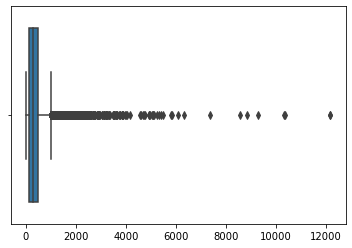

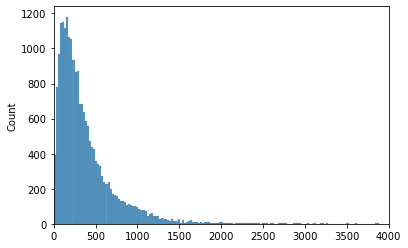

count    21072.000000
mean       385.882688
std        441.586704
min          3.000000
25%        144.000000
50%        270.000000
75%        484.000000
max      12160.000000
Name: char_length, dtype: float64

In [17]:
# Write your code here to visualise the data according to the 'Complaint' character length
import seaborn as sb
import matplotlib.pyplot as plt
df_length = df_clean[["complaint_POS_removed"]].copy()
df_length["char_length"] = df_length["complaint_POS_removed"].apply(lambda x: len(str(x)))
length_comp=list(df_length["char_length"])
sb.boxplot(length_comp)
plt.show()
hist=sb.histplot(length_comp)
hist.set_xlim(0,4000)
plt.show()
df_length["char_length"].describe()

##### Observation : The maximum character length of complaint is 12160 and the average complaint length is 385 characters. Most of the complaints are within 500 characters

#### Find the top 40 words by frequency among all the articles after processing the text.

The top frequent words with their frequency are :  [('credit card', 12754), ('chase', 9682), ('time', 9248), ('bank', 5943), ('information', 5037), ('issue', 4427), ('day', 4349), ('month', 3948), ('credit report', 3825), ('state', 3824), ('money', 3498), ('company', 3338), ('customer service', 3051), ('year', 3027), ('check account', 2976), ('letter', 2821), ('week', 2779), ('request', 2757), ('nothing', 2725), ('transaction', 2698), ('fee', 2683), ('customer', 2613), ('claim', 2569), ('person', 2526), ('way', 2525), ('document', 2488), ('anything', 2427), ('fact', 2412), ('point', 2389), ('reason', 2388), ('case', 2386), ('someone', 2382), ('bank account', 2354), ('process', 2348), ('account account', 2320), ('problem', 2313), ('today', 2310), ('account chase', 2252), ('amount', 2183), ('fraud', 2161)]


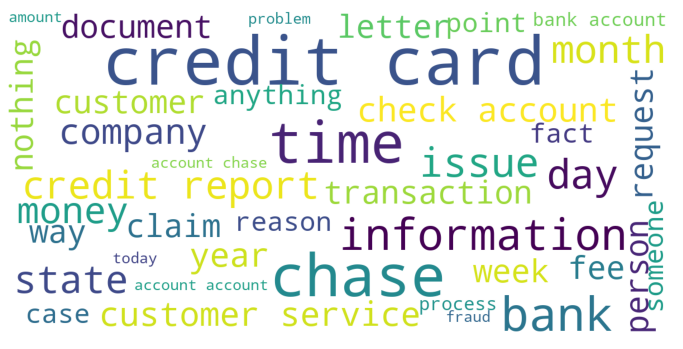

In [18]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# from nltk.tokenize import word_tokenize
# words = word_tokenize(document)

def show_wordcloud(data, title = None):
    stopwords = set(STOPWORDS)
    data_all=" ".join(list(data))
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=40,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(data_all)
    
    text_dict=wordcloud.process_text(data_all)
    word_freq={k: v for k, v in sorted(text_dict.items(),reverse=True, key=lambda item: item[1])}
    print("The top frequent words with their frequency are : ",list(word_freq.items())[:40])
    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

df_clean["complaint_POS_removed"] = df_clean["complaint_POS_removed"].astype(str)
show_wordcloud(df_clean["complaint_POS_removed"])

In [19]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [20]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
from nltk import ngrams,FreqDist
from collections import OrderedDict

complaint_all=" ".join(list(df_clean['Complaint_clean']))
print("Length of all complaints together",len(complaint_all))

def ngram_extract(data,n,top):
  ngram = ngrams(data.split(" "), n)
  #compute frequency distribution for all the bigrams in the text
  fdist = FreqDist(ngram)
  word_freq={k: v for k, v in sorted(fdist.items(),reverse=True, key=lambda item: item[1])}
  top_ngrams=list(word_freq.items())[:top]
  return OrderedDict(word_freq),top_ngrams
  
unigram_freq_dist,top_unigrams=ngram_extract(complaint_all,1,30)
print(f"The top 30 unigrams with their frequency are : {top_unigrams}")

Length of all complaints together 8152391
The top 30 unigrams with their frequency are : [(('account',), 46660), (('chase',), 34979), (('credit',), 32962), (('card',), 30017), (('payment',), 21040), (('bank',), 19067), (('time',), 15963), (('charge',), 14168), (('check',), 12817), (('day',), 12784), (('money',), 11950), (('loan',), 10666), (('information',), 9651), (('letter',), 9415), (('report',), 8674), (('fee',), 8674), (('number',), 8600), (('transaction',), 8559), (('month',), 8412), (('amount',), 8342), (('year',), 8241), (('customer',), 8136), (('mortgage',), 8048), (('balance',), 7663), (('phone',), 7618), (('service',), 7595), (('company',), 7567), (('call',), 7339), (('claim',), 7234), (('state',), 7013)]


In [21]:
#Print the top 10 words in the unigram frequency
def extract_top_words_fdist(fdist,top):
    words=list(fdist.keys())[:top]
    words=[" ".join(word) for word in words]
    return words

top_10_unigrams=extract_top_words_fdist(unigram_freq_dist,10)
print("The top 10 words by unigram frequency are : ",top_10_unigrams)

The top 10 words by unigram frequency are :  ['account', 'chase', 'credit', 'card', 'payment', 'bank', 'time', 'charge', 'check', 'day']


In [22]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
bigram_freq_dist,top_bigrams=ngram_extract(complaint_all,2,30)
print(f"The top 30 bigrams with their frequency are : {top_bigrams}")

The top 30 bigrams with their frequency are : [(('credit', 'card'), 12754), (('credit', 'report'), 3825), (('customer', 'service'), 3051), (('check', 'account'), 2976), (('bank', 'account'), 2354), (('account', 'account'), 2320), (('account', 'chase'), 2252), (('chase', 'credit'), 2109), (('chase', 'account'), 2039), (('debit', 'card'), 1948), (('card', 'account'), 1699), (('credit', 'score'), 1686), (('phone', 'call'), 1644), (('account', 'credit'), 1550), (('payment', 'payment'), 1420), (('money', 'account'), 1323), (('interest', 'rate'), 1293), (('chase', 'card'), 1271), (('phone', 'number'), 1249), (('account', 'bank'), 1235), (('business', 'day'), 1161), (('account', 'number'), 1157), (('card', 'company'), 1122), (('card', 'chase'), 1117), (('card', 'credit'), 1116), (('checking', 'account'), 1102), (('charge', 'account'), 1094), (('mortgage', 'payment'), 1047), (('card', 'card'), 1038), (('credit', 'account'), 982)]


In [23]:
#Print the top 10 words in the bigram frequency
top_10_bigrams=extract_top_words_fdist(bigram_freq_dist,10)
print("The top 10 words by bigram frequency are : ",top_10_bigrams)

The top 10 words by bigram frequency are :  ['credit card', 'credit report', 'customer service', 'check account', 'bank account', 'account account', 'account chase', 'chase credit', 'chase account', 'debit card']


In [24]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
trigram_freq_dist,top_trigrams=ngram_extract(complaint_all,3,30)
print(f"The top 30 bigrams with their frequency are : {top_trigrams}")

The top 30 bigrams with their frequency are : [(('chase', 'credit', 'card'), 1552), (('credit', 'card', 'account'), 1087), (('credit', 'card', 'company'), 991), (('credit', 'card', 'credit'), 542), (('credit', 'card', 'chase'), 511), (('inquiry', 'credit', 'report'), 507), (('account', 'credit', 'card'), 497), (('card', 'credit', 'card'), 442), (('charge', 'credit', 'card'), 432), (('chase', 'check', 'account'), 394), (('credit', 'report', 'credit'), 386), (('customer', 'service', 'representative'), 347), (('credit', 'reporting', 'agency'), 333), (('credit', 'card', 'payment'), 302), (('credit', 'card', 'charge'), 296), (('account', 'credit', 'report'), 270), (('credit', 'card', 'balance'), 267), (('payment', 'credit', 'card'), 260), (('credit', 'card', 'card'), 260), (('chase', 'bank', 'account'), 249), (('victim', 'identity', 'theft'), 248), (('account', 'chase', 'account'), 232), (('credit', 'reporting', 'act'), 230), (('credit', 'card', 'service'), 226), (('credit', 'card', 'statem

In [25]:
#Print the top 10 words in the trigram frequency
top_10_trigrams=extract_top_words_fdist(trigram_freq_dist,10)
print("The top 10 words by trigram frequency are : ",top_10_trigrams)

The top 10 words by trigram frequency are :  ['chase credit card', 'credit card account', 'credit card company', 'credit card credit', 'credit card chase', 'inquiry credit report', 'account credit card', 'card credit card', 'charge credit card', 'chase check account']


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [26]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [27]:
#All masked texts has been removed
df_clean.head()

,complaint_what_happened,lemm_complaints,complaint_POS_removed,Complaint_clean
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop debt verification statement ...,morning name stop debt verification statement ...
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade anniversary date agent info...,card agent upgrade anniversary date agent info...
2,Chase Card was reported on XX/XX/2019. However...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...
3,"On XX/XX/2018, while trying to book a XXXX XX...",on while try to book a xxxx xxxx ticket ...,ticket offer ticket reward card information of...,ticket offer ticket reward card information of...
4,my grand son give me check for {$1600.00} i de...,my grand son give I check for I deposit it i...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [36]:
#Write your code here to initialise the TfidfVectorizer 
tfidf = TfidfVectorizer()

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [37]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean['Complaint_clean'])
dtm_df=pd.DataFrame(dtm.toarray(), columns=tfidf.get_feature_names_out())
print("The shape of document term matrix is ",dtm_df.shape)

The shape of document term matrix is  (21072, 15087)


## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [38]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [39]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(n_components=num_topics,random_state=40)
W = nmf_model.fit_transform(dtm)  # Document-topic matrix
H = nmf_model.components_       # Topic-term matrix

In [40]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names())

c:\Users\Karthick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



15087

In [43]:
#Print the Top15 words for each of the topics
tot_words=15
words = np.array(tfidf.get_feature_names_out())
topic_words = pd.DataFrame(np.zeros((num_topics, tot_words)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(tot_words)]).astype(str)
for i in range(num_topics):
    ix = H[i].argsort()[::-1][:tot_words]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,check,bank,money,fund,deposit,chase,branch,day,number,business,transfer,customer,transaction,fee
Topic 2,card,credit,chase,balance,account,limit,score,year,point,month,offer,purchase,interest,application,reason
Topic 3,payment,loan,mortgage,month,home,modification,interest,chase,time,year,rate,balance,property,amount,statement
Topic 4,report,inquiry,credit,information,company,reporting,bureaus,debt,identity,account,theft,score,file,letter,date
Topic 5,charge,dispute,transaction,fee,merchant,chase,claim,fraud,purchase,amount,email,service,time,company,day


In [ ]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4



In [ ]:
#Assign the best topic to each of the cmplaints in Topic Column

df_clean['Topic'] = #write your code to assign topics to each rows.

In [ ]:
df_clean.head()

In [ ]:
#Print the first 5 Complaint for each of the Topics
df_clean=df_clean.groupby('Topic').head(5)
df_clean.sort_values('Topic')

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [ ]:
#Create the dictionary of Topic names and Topics

Topic_names = {   }
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [ ]:
df_clean

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [ ]:
#Create the dictionary again of Topic names and Topics

Topic_names = {   }
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [ ]:
df_clean

In [ ]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=

In [ ]:
training_data

####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [ ]:

#Write your code to get the Vector count


#Write your code here to transform the word vector to tf-idf

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [ ]:
# Write your code here to build any 3 models and evaluate them using the required metrics



